In [44]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.tools.plotting import scatter_matrix # correlation matrix


 Association is any relationship of variables that renders them statistically dependent. 
 
 It is more important to identify association and measure the strength of  assocation among different variabels. For example, we can select important variables which have strong association with response variable in order to build powerful and accurate prediction models,  which is called **featrure selection**. We can reduce the number of variables (** dimension reduction ** ) based on their covariance  matrix,  but keep most variation of data. 
 
How to measure strength of association is still a popular and challenging  problem, because
- association between categorical variables and association between numerical variables are different
- varibles may have linear association or nonlinear association and  it is very hard to detect nonlinear association. 
- there may exists marginally uncrrelated variables: A and B seems not associted with any association measure. But if B is combined with C, then A and (B,C) have strong association. We say A and B are marginally uncorrelated. 

 

## Association between Categorical Variables 
To find association between categorical variables, we need to build ** contingency table**

- In statistics, a contingency table is a type of table in a matrix format that displays the (multivariate) frequency distribution of the variables.

-  They provide a basic picture of the interrelation between two variables and can help find interactions between them. 


- variables can be categorical or discrete numerical with finite possible values

In python, it is very convenient to build contingeny table from data, using method from pandas . For example, suppose we have a pair of  categorical variabels x1 and x2:

In [7]:
x1=pd.Series(['Good', 'Good', 'Bad','Bad','Good','Bad','Good','Good'])
x2=pd.Series(['A','A','A','B','B','A','B','B'])


x1 and x2 is a pair. For example, when x1[0]='Good', x2[0]='A', ('Good','A') is one observation. Totally we have 8 observation is this sample. Next we use pd.crosstab to find contingency table. 

In [9]:
Contingency_table=pd.crosstab(x1,x2)

In [10]:
print(type(Contingency_table))
Contingency_table

<class 'pandas.core.frame.DataFrame'>


col_0,A,B
row_0,,
Bad,2,1
Good,2,3


Contingency table is to compute the frequency of occurrence of each combination, hence it can also be computed between two discrete numerical variables or one discrete numerical variable and one categorical variable.

In [12]:
#one categorical, one numerical
xc=pd.Series(['female','female','male','male','male','male','female','male','male'])
yn=pd.Series([65,65,85,92,92,92,85,85,65])

In [13]:
Table=pd.crosstab(xc,yn)
Table

col_0,65,85,92
row_0,,,
female,2,1,0
male,1,2,3


With contingency table, now we can compute chi-square. 
Consider data

|Republican|	Democrat|	Totals
--|--|--|
M|	215|	143|	358
F	|19	|64	|83
Totals	|234|	207|	441



In [17]:

R=pd.DataFrame([[215,143],[19,64]]) 
R

,0,1
0,215,143
1,19,64



-  We have 358 males and 83 females, if there is no association, the percentage of male and female will be the same for republican, Democrat and totals

- The percentage of male is $\frac{358}{441}$, hence the number of male republican should be $234\times \frac{358}{441}$ if no association
- Then we have benchmark table as follows with the assumption that there are no association between row variable and column variable. 

|Republican|	Democrat|	Totals
--|--|--|
M|	189.95|168.04	|	358
F	|  44.04 |38.96	|83
Totals	| 234 |207	|	441

In [18]:
B=pd.DataFrame([[ 189.96 , 168.04],
                          [44.04 , 38.96]])
B

,0,1
0,189.96,168.04
1,44.04,38.96


 **Chi-square** is to measure the difference between contingency table  and benchmmark table. If the difference is large, the relashipship between these two varibles is far from "no association". How we measure the difference?
- subtract bechmark table from  bechchmark table
- Square the difference $(R —B)^2$.
- Divide the squares obtained by corresponding elements from benchmark table: $\frac{(R-B)^2}{B}$
- $\frac{(R-B)^2}{B}$. This is the chi square statistic.

In [19]:
R-B

,0,1
0,25.04,-25.04
1,-25.04,25.04


In [20]:
(R-B)**2

,0,1
0,627.0016,627.0016
1,627.0016,627.0016


In [21]:
(R-B)**2/B

,0,1
0,3.300703,3.731264
1,14.237094,16.093470


Finally, sum up the entries in difference table 

In [23]:
((R-B)**2/B ).sum().sum()

37.36253106791435

which is chi-square between row variable and column variable in contingency table.  Python also have built-in function:**chi2_contingency** from scipy module 

In [26]:
from scipy.stats import chi2_contingency
chi2=chi2_contingency(R, correction=False)
print(chi2)

(37.365036593000418, 9.7962670163339823e-10, 1, array([[ 189.95918367,  168.04081633],
       [  44.04081633,   38.95918367]]))


**chi2_contingency** output a list with for entries: the first one is chi-square and the last one is benchmark table. 

In [71]:
print("chi-suqare is", chi2[0])
print('The benchmark table is', chi2[-1])

chi-suqare is 35.8877686481
The benchmark table is [[ 189.95918367  168.04081633]
 [  44.04081633   38.95918367]]


 How to interpret chi-square ($\chi^2$)?
- if $\chi^2\ne 0$, we say variables have association,
- if $\chi^2=0$, variables have no association

But we cannot use $\chi^2$ to measure the strength of association. Let us see the following example . We want compare the associations. 

|Lung|	Breast|	Liver|total
--|--|--|
Middle|	20|	40|	60|120
East	|134	|107	|241|482   
west|80|60|140|280
Totals	|234|	207	|441|882

|Lung|	Breast|	Liver|total
--|--|--|
above 50|	154|	147|	301|602
below 50|80|60|140|280
Totals	|234|	207	|441|882
In these two tables, they have different numbers of possible values for row varaibles.  Calculate $\chi^2$

In [28]:
location_chi2=chi2_contingency(pd.DataFrame([[20,40,60],[134,107,241],[80,60,140]]),correction=False)[0]
print("The chi-square between location and cancer types is", location_chi2)
age_chi2=chi2_contingency(pd.DataFrame([[154,147,301],[80,60,140]]),correction=False)[0]
print("The chi-square between age and cancer types is", age_chi2)

The chi-square between location and cancer types is 10.9366398831
The chi-square between age and cancer types is 1.37201524461


The chi-suqare for location and cancer is almost 10 times of that between age and cancer. But we cannot judge that the association between location and cancer is also 10 times stronger, because these two contingency tables have different number of rows. In order to make comparison, we need to standardize our chi-square by the numbers of rows or columns, and we have Cramer's V: Standardized Chi-square($\chi^2$)
$$
V=\sqrt{\frac{\chi^2}{n\times min(r-1,c-1)}}
$$
- r: number of rows
- c:number of columns
- n: sample size

Very nicely, Cramer's V takes values between 0 and 1. If V is close to 0, there is no or weak association. If V is close to 1, we say two varaibles have strong association. 

In [29]:
print ("Cramer's V between location and cancer is:", (location_chi2/(882*2))**0.5)


#for age
#print chi2_contingency(np.array([[154,147,301],[80,60,140]]))[0] 
print( "Cramer's V between age and cancer is:", (age_chi2 /882*1)**0.5)


Cramer's V between location and cancer is: 0.0787395023528
Cramer's V between age and cancer is: 0.0394407510032


The difference is not as large as that if using chi-square. Cramer' V is a very important measure, since it can be applied to compare the strength of association. When we build prediction models , we can use it as a measure to select most related predictors. It measures the strength of association between
-  two categorical variables
- one categorical variable, one discrete numerical variable
- two discrete numerical variables

Even for continuous variable, we can discretize variable and transform it into a discrete numerical variable. For example , we have a sample from a normal variable

In [35]:
ndata=pd.DataFrame()
ndata['x']=np.random.randn(100)
xmean=ndata['x'].mean()

We can discretize it with the rule: it is changed into 0 if the value is less then mean and equal to 1 otherwise.

(array([ 51.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  49.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

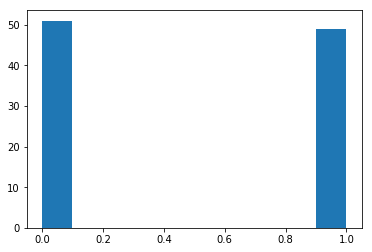

In [36]:
ndata['Dis_x']=[0 if x <xmean else 1 for x in ndata['x']]
plt.hist(ndata['Dis_x'])

### In-class practice 

In [37]:
indicedata=pd.read_csv('data/indicepanel.csv',index_col=0)
indicedata.head()

,nikkei,aord,nyse,dax,ftse,hangseng,sp500,djia
2013-09-06,13860.81,5144.0,9420.3480,8234.98,6547.33,22621.22,1655.08,14937.48
2013-09-09,14205.23,5179.4,9420.3480,8234.98,6530.74,22750.65,1655.08,14937.48
2013-09-10,14423.36,5198.9,9539.9320,8276.32,6583.99,22976.65,1671.71,15063.12
2013-09-11,14425.07,5230.6,9620.7100,8446.54,6588.43,22937.14,1683.99,15191.06
2013-09-12,14387.27,5238.2,9655.3774,8495.73,6588.98,22953.72,1689.13,15326.60


We will work on historical data of indices from multiple exchanges.  

Discretize these 8 indices' returns, check which index has the highest association with that of SP500 except NYSE and DJIA. 

## Association between Two Numerical Variables 

It is well known that, covaraince is to measure the association between two varaibles. 


$$Population:~Cov(X,Y)=\frac{\sum_{i=1}^N(X_i-\mu_X)(Y_i-\mu_Y)}{N}$$
 $$sample:~cov(X,Y)=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{n-1}$$
if X=Y, we have $cov(X,Y)=var(X)$.  For example, we can compute covariance between difference indice. 

In pandas, the DataFrame has built-in method to compute covariance which is normalized by **$n-1$** 

In [38]:
indicedata.cov()

,nikkei,aord,nyse,dax,ftse,hangseng,sp500,djia
nikkei,3.894758e+06,252217.649912,678700.841656,1.915557e+06,316856.817921,1.951345e+06,280180.344110,2.326173e+06
aord,2.522176e+05,63029.365772,127522.023370,2.117248e+05,88375.060843,3.546045e+05,32615.811961,3.015349e+05
nyse,6.787008e+05,127522.023370,342375.867902,5.186495e+05,205714.344877,8.562295e+05,92151.300068,8.386594e+05
dax,1.915557e+06,211724.801842,518649.535997,1.243318e+06,314067.447841,1.281248e+06,186289.366634,1.632731e+06
ftse,3.168568e+05,88375.060843,205714.344877,3.140674e+05,164781.632296,5.910306e+05,50699.174350,4.985828e+05
hangseng,1.951345e+06,354604.494108,856229.510097,1.281248e+06,591030.640570,3.922968e+06,164949.357230,1.572834e+06
sp500,2.801803e+05,32615.811961,92151.300068,1.862894e+05,50699.174350,1.649494e+05,35825.697201,3.122017e+05
djia,2.326173e+06,301534.910400,838659.368265,1.632731e+06,498582.787922,1.572834e+06,312201.686241,2.813543e+06


But similar to chi-square,  it only can tell that the pair 
- has no association if $cov=0$. 

- has association if $cov!=0$

To evaluate the strength of association, we need to compute coefficient of correlation

$$Population:~\rho (X,Y)=\frac{Cov(X,Y)}{\sigma_X,\sigma_Y}$$

 $$sample:~r(X,Y)=\frac{cov(x,y)}{s_xs_y}$$

$-1\le \rho, r \le 1$ which means, if $\rho(r)=0$, there is no association. If  $\rho (r)) $ is close to 1, there is strong and positive correlation. If $\rho (r)) $ is close to -1, there is strong and negative correlation.

In [39]:
indicedata.corr()

,nikkei,aord,nyse,dax,ftse,hangseng,sp500,djia
nikkei,1.000000,0.509054,0.587742,0.870490,0.395520,0.499214,0.750067,0.702708
aord,0.509054,1.000000,0.868085,0.756326,0.867169,0.713125,0.686372,0.716043
nyse,0.587742,0.868085,1.000000,0.794935,0.866081,0.738807,0.832056,0.854491
dax,0.870490,0.756326,0.794935,1.000000,0.693869,0.580143,0.882673,0.872965
ftse,0.395520,0.867169,0.866081,0.693869,1.000000,0.735103,0.659856,0.732245
hangseng,0.499214,0.713125,0.738807,0.580143,0.735103,1.000000,0.439993,0.473422
sp500,0.750067,0.686372,0.832056,0.882673,0.659856,0.439993,1.000000,0.983357
djia,0.702708,0.716043,0.854491,0.872965,0.732245,0.473422,0.983357,1.000000


The diagonal entries in correlation matrix is all '1', because all variables are perfectly correlated with their selves.  

if $\rho(r)$ is close to 0, we need to interpret it carefully.  Let us see the following example. 

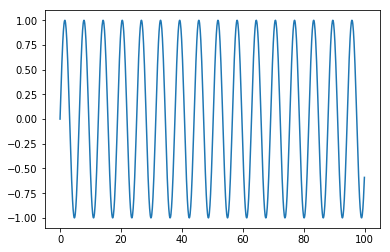

In [42]:
x=0.1*np.arange(0,1000)
y=np.sin(x)
plt.plot(x,y)
sinwave=pd.DataFrame()
sinwave['x']=x
sinwave['y']=y

In [43]:
sinwave.corr()

,x,y
x,1.000000,-0.045111
y,-0.045111,1.000000


The correlation is very small, but we know that, x and y has a determined pattern of sine wave which means they have definite association. If we compute correlation and explain it carelessly, we will jump into a wrong conclusion. One easy way to avoid such a mistake is to draw the scatter graph. 

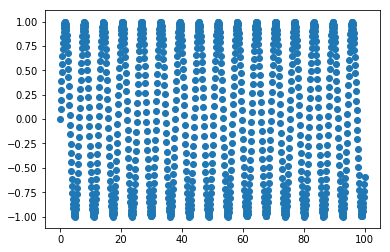

In [137]:
scatterxy=plt.scatter(x,y)

If we have multiple variables, we can draw scatter matrix plot, which is a method in pandas. 

/home/imwan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


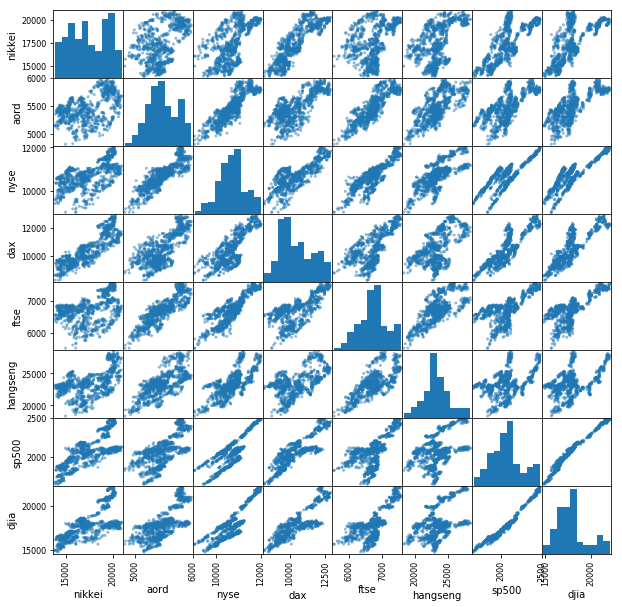

In [45]:

sm=scatter_matrix(indicedata,figsize=(10,10))

##  Association vs. causality
Causation is the relationship of variables, that changes in one variable measured directly cause changes in others. 
In order to actually be able to claim causation, we have to split subjects randomly into different groups, and assign one group with the impact  we want to study (like taking a new medicine), while the rest don't. Unlike in association studies, this random assignment assures  that it is the impact   being studied, and not some other random effect, that is causing the outcome. A statistical method callsed "Bayesian network" can also been applied to detect casuation  which is now a very hot topic and being extended to study the pattern of time series data. 

In statistics, a spurious relationship or spurious correlation is a mathematical relationship in which two or more events or variables are not causally related to each other, yet it may be wrongly inferred that they are, due to either coincidence or the presence of a certain third, unseen factor (referred to as a "common response variable", "confounding factor", or "lurking variable").  A youtube video explains this concept in details .[How Ice Cream Kills!](https://www.youtube.com/watch?v=VMUQSMFGBDo)
